In [ ]:
import tensorflow as tf
import functools
import numpy as np

In [ ]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
X = np.linspace(0,10,10)
Y = X + np.random.randn(*X.shape)

In [17]:
for x,y in zip(X,Y):
  print((round(x,1), round(y,1)))

(0.0, -2.6)
(1.1, 0.5)
(2.2, 3.2)
(3.3, 3.5)
(4.4, 3.4)
(5.6, 5.5)
(6.7, 6.7)
(7.8, 8.4)
(8.9, 7.1)
(10.0, 8.9)


In [18]:
model = Sequential()

In [19]:
# layer 쌓기
model.add(Dense(input_dim=1, units=1, activation='linear', use_bias=False))

In [20]:
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

In [31]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print(w)

0.930169


In [32]:
model.fit(X,Y,batch_size=10,epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 1.2300
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 1.2300
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2300


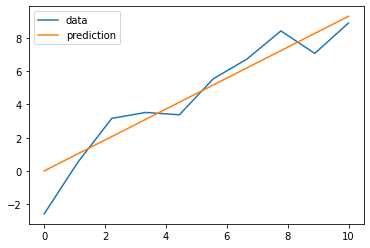

In [33]:
plt.plot(X,Y, label='data')
plt.plot(X,w*X, label='prediction')
plt.legend()
plt.show()

In [38]:
import random
import matplotlib.pylab as plt

In [35]:
mnist = tf.keras.datasets.mnist

In [36]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [39]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [40]:
X_train0

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [41]:
y_train0

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

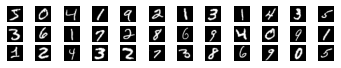

In [42]:
plt.figure(figsize=(6,1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap='gray')
    plt.axis('off')
plt.show()


In [43]:
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0


In [44]:
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0

In [45]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [47]:
from tensorflow.keras.utils import to_categorical

#dl의 layer를 쌓을 수 있는 틀역할 객체
from tensorflow.keras.models import Sequential
#각 layer에 해당하는 객체
from tensorflow.keras.layers import Dense
#옵티마이저 필요: 학습률 조절
from tensorflow.keras.optimizers import SGD

In [48]:
Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [49]:
tf.random.set_seed(0)

In [50]:
#신경망 구축 시작
#1. 틀역할 객체 생성
#2. layer를 쌓아라.
#3. model을 컴파일, compile

model = Sequential()

In [51]:
model.add(Dense(15, input_dim=784, activation='sigmoid'))

In [53]:
model.add(Dense(10,activation='sigmoid'))

In [54]:
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
%%time
hist = model.fit(X_train, Y_train,
                epochs=20, batch_size=100,
                 validation_data=(X_test, Y_test), 
                 verbose=2
                )

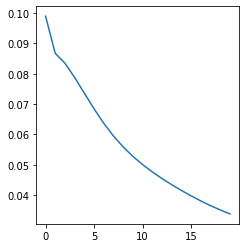

In [56]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.show()

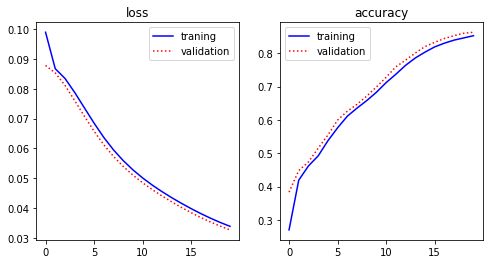

In [69]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label='traning')
plt.plot(hist.history['val_loss'], 'r:', label='validation')
plt.title('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'b-', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='validation')
plt.title('accuracy')
plt.legend()

plt.show()

In [ ]:
hist.history

In [67]:
model.predict(X_test[:1,:])

array([[0.07847008, 0.0175702 , 0.03043723, 0.09370032, 0.03188559,
        0.07221225, 0.00115937, 0.8173456 , 0.05743414, 0.1919438 ]],
      dtype=float32)

In [77]:
model.predict_classes(X_test[:1,:], verbose=0)

array([7])

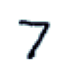

In [74]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[0], cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

In [75]:
model.predict(X_test[1:2,:])

array([[0.16747728, 0.05332467, 0.37588334, 0.08386499, 0.01498866,
        0.06657639, 0.31780875, 0.00518987, 0.06138787, 0.02062959]],
      dtype=float32)

In [78]:
model.predict_classes(X_test[1:2,:], verbose=0)

array([2])

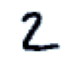

In [79]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[1], cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

In [80]:
model.save('my_model.hdf5')

In [81]:
del model

In [82]:
from tensorflow.keras.models import load_model

In [83]:
model2 = load_model('my_model.hdf5')
print(model2.predict_classes(X_test[:1,:], verbose=0))

[7]
